# ParabolicSAR クラスのテスト

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np
import pandas as pd
import yfinance as yf

from module.psar import ParabolicSAR

## Yahoo Finance からデータ取得

In [26]:
code = "7011"
symbol = f"{code}.T"
ticker = yf.Ticker(symbol)

# 日足で過去 2 年分のデータを取得
df0 = ticker.history(period="2y", interval="1d")

# ローソク足のチャートには、そのうち過去 1 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_1y = datetime.timedelta(days=365)
df = df0[df0.index >= dt_last - tdelta_1y].copy()
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-07-03 00:00:00+09:00,3544.0,3547.0,3441.0,3463.0,26881200,0.0,0.0
2025-07-04 00:00:00+09:00,3497.0,3498.0,3376.0,3395.0,29159500,0.0,0.0


## Parabolic SAR の算出

In [28]:
psar = ParabolicSAR()
psar.calc(df)
df.tail(2)

np.float64(-2.0)

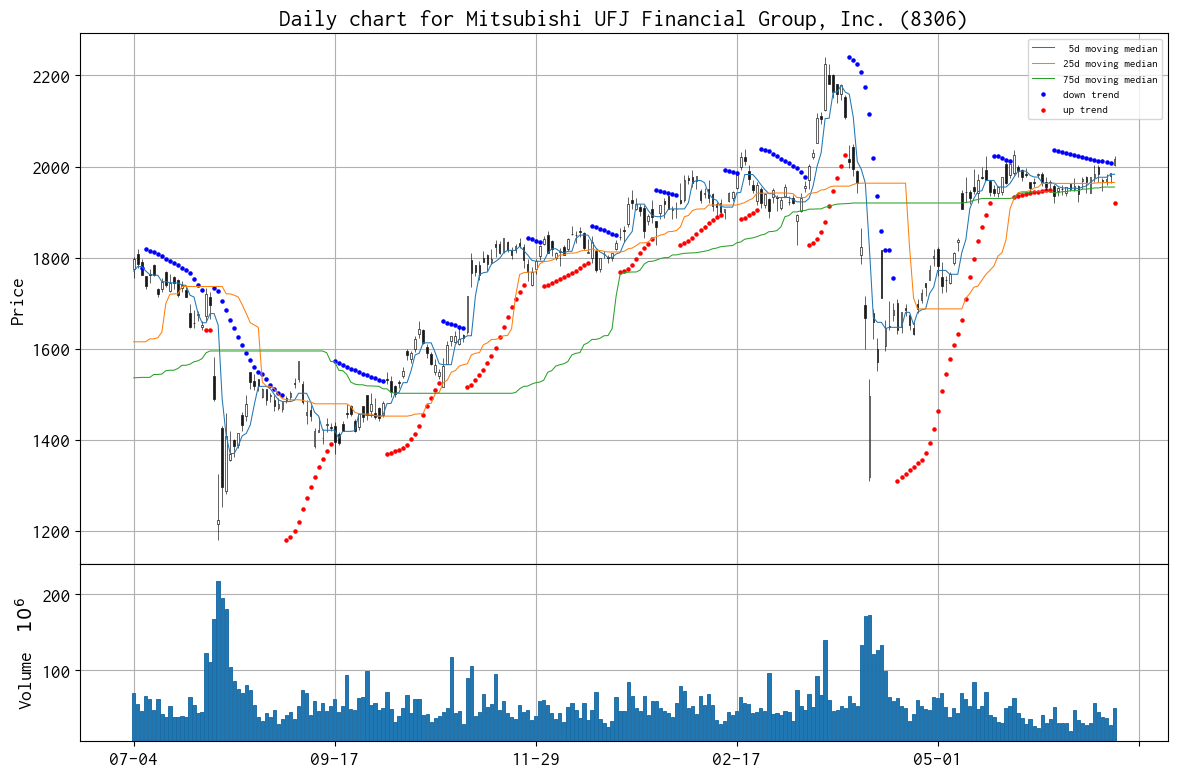

In [21]:
FONT_PATH = "../fonts/RictyDiminished-Regular.ttf"
fm.fontManager.addfont(FONT_PATH)

# FontPropertiesオブジェクト生成（名前の取得のため）
font_prop = fm.FontProperties(fname=FONT_PATH)
font_prop.get_name()

plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["font.size"] = 14
fig = plt.figure(figsize=(12, 8))
ax = dict()
n = 2
gs = fig.add_gridspec(
    n, 1, wspace=0.0, hspace=0.0, height_ratios=[3 if i == 0 else 1 for i in range(n)]
)
for i, axis in enumerate(gs.subplots(sharex="col")):
    ax[i] = axis
    ax[i].grid()

mm05 = df0["Close"].rolling(5).median()
mm25 = df0["Close"].rolling(25).median()
mm75 = df0["Close"].rolling(75).median()

apds = [
    mpf.make_addplot(mm05[df.index], width=0.75, label=" 5d moving median", ax=ax[0]),
    mpf.make_addplot(mm25[df.index], width=0.75, label="25d moving median", ax=ax[0]),
    mpf.make_addplot(mm75[df.index], width=0.75, label="75d moving median", ax=ax[0]),
    mpf.make_addplot(
        df["Bear"],
        type="scatter",
        marker="o",
        markersize=5,
        color="blue",
        label="down trend",
        ax=ax[0],
    ),
    mpf.make_addplot(
        df["Bull"],
        type="scatter",
        marker="o",
        markersize=5,
        color="red",
        label="up trend",
        ax=ax[0],
    ),
]

mpf.plot(
    df,
    type="candle",
    style="default",
    volume=ax[1],
    datetime_format="%m-%d",
    addplot=apds,
    xrotation=0,
    ax=ax[0],
)

if "longName" in ticker.info.keys():
    ax[0].set_title(f"Daily chart for {ticker.info["longName"]} ({code})")
elif "shortName" in ticker.info.keys():
    ax[0].set_title(f"Daily chart for {ticker.info["shortName"]} ({code})")
else:
    ax[0].set_title(f"Daily chart for {code}")

ax[0].legend(loc="best", fontsize=8)


plt.tight_layout()
#plt.savefig(f"report_daily_chart_parabolic_{code}.png")
plt.show()